In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
 
import warnings   # To ignore any warnings 
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('bigmart sales prediction_Train.csv')
test = pd.read_csv('bigmart sales prediction_Test.csv')

In [3]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [4]:
train_original=train.copy() 
test_original=test.copy()

In [5]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

(None, None)

In [6]:
# merge train and test data
train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
sales = pd.concat([train, test], sort=False)
print(train.shape, test.shape, sales.shape)

(8523, 13) (5681, 13) (14204, 13)


In [7]:
sales['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

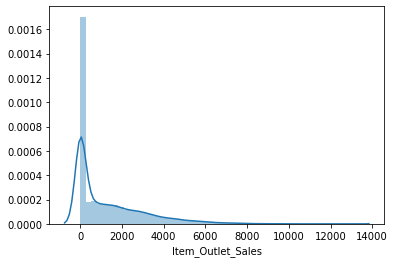

In [8]:
sns.distplot(sales['Item_Outlet_Sales']);

In [9]:
print('Skewness: ', sales['Item_Outlet_Sales'].skew())
print('Kurtsis: ', sales['Item_Outlet_Sales'].kurt())

Skewness:  1.5446838706795232
Kurtsis:  2.4194394261737604


<ul>Deviate from the normal distribution.</ul>
<ul>Have appreciable positive skewness.</ul>
<ul>Show peakedness.</ul>

In [10]:
# splitting the data into categoriacl and numerical features
categorical_features = sales.select_dtypes(include = [np.object])
categorical_features.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train


In [11]:
numerical_features = sales.select_dtypes(include = [np.number])
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


In [12]:
sales['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

Let’s start with univariate EDA. It involves exploring variables individually. We will try to visualize the continuous variables using histograms and categorical variables using bar plots.

### Target Variable
Since our target variable is continuous, we can visualise it by plotting its histogram.

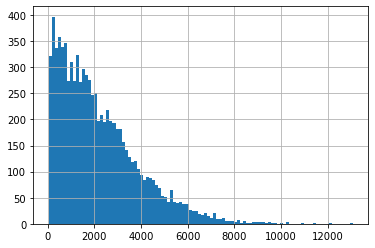

In [13]:
train['Item_Outlet_Sales'].hist(bins = 100);

As you can see, it is a right skewd variable and would need some data transformation to treat its skewness.

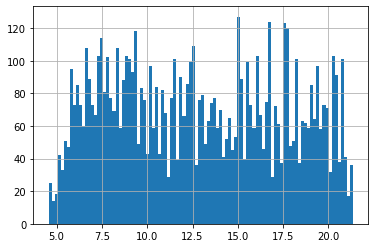

In [14]:
train['Item_Weight'].hist(bins = 100);

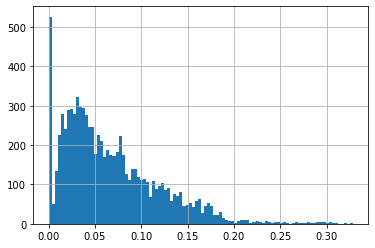

In [15]:
train['Item_Visibility'].hist(bins = 100);

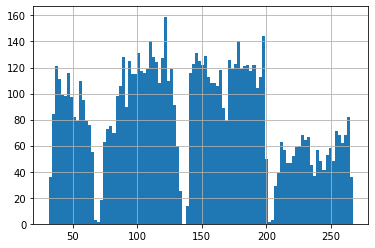

In [16]:
train['Item_MRP'].hist(bins = 100);

#### Observations

There seems to be no clear-cut pattern in Item_Weight.
Item_Visibility is right-skewed and should be transformed to curb its skewness.
We can clearly see 4 different distributions for Item_MRP. It is an interesting insight.

### Independent Variables (categorical variables)

Now we’ll try to explore and gain some insights from the categorical variables. A categorical variable or feature can have only a finite set of values. Let’s first plot Item_Fat_Content.

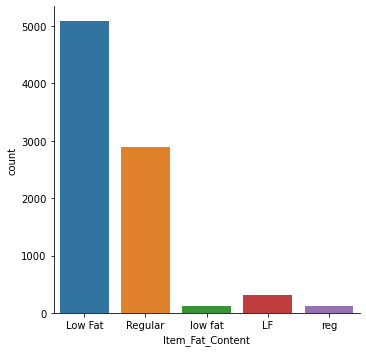

In [17]:
sns.catplot(x="Item_Fat_Content", kind="count", data=train);

In [18]:
train['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'},inplace = True)

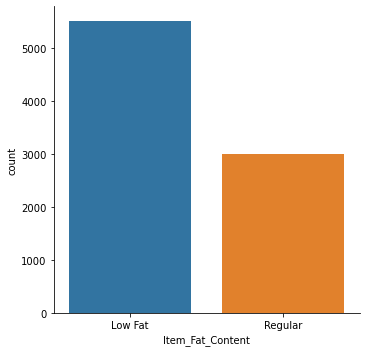

In [19]:
sns.catplot('Item_Fat_Content',kind = 'count',data = train);

### Now lets check other categorical variables

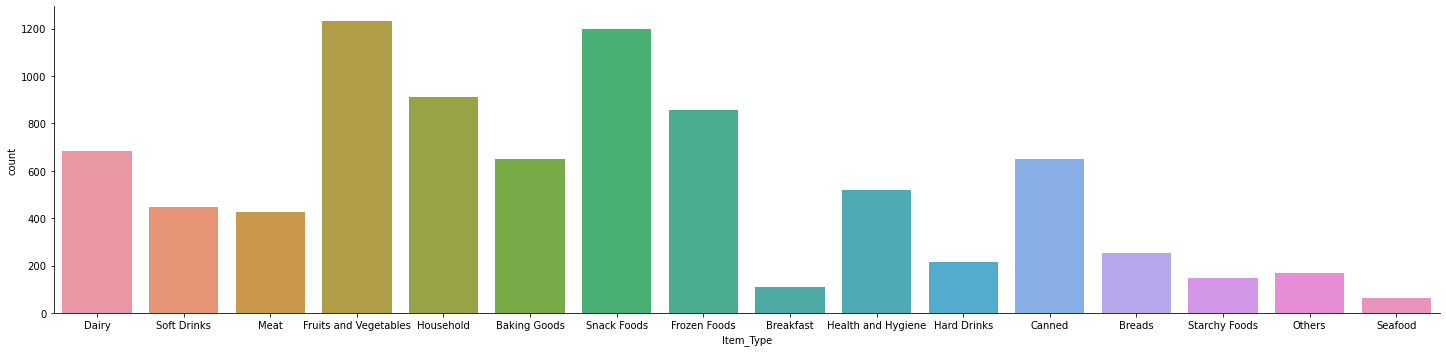

In [20]:
sns.catplot('Item_Type',kind = 'count',data = train,aspect =4);

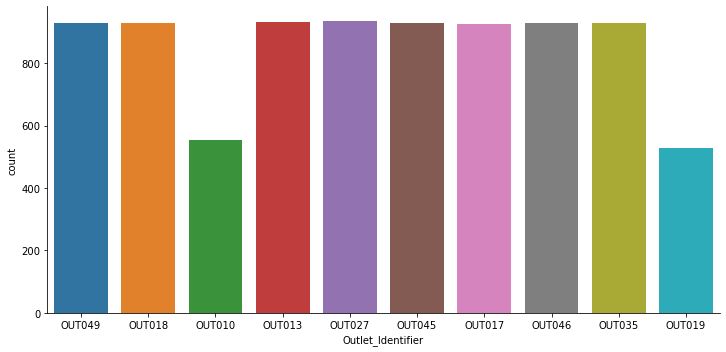

In [21]:
sns.catplot('Outlet_Identifier',kind = 'count',data = train,aspect = 2);

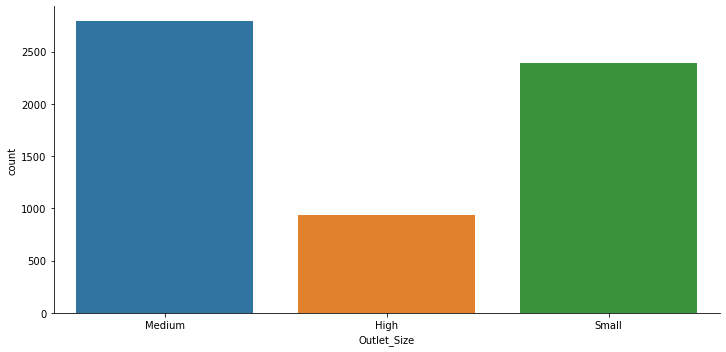

In [22]:
sns.catplot('Outlet_Size',kind = 'count',data = train,aspect = 2);

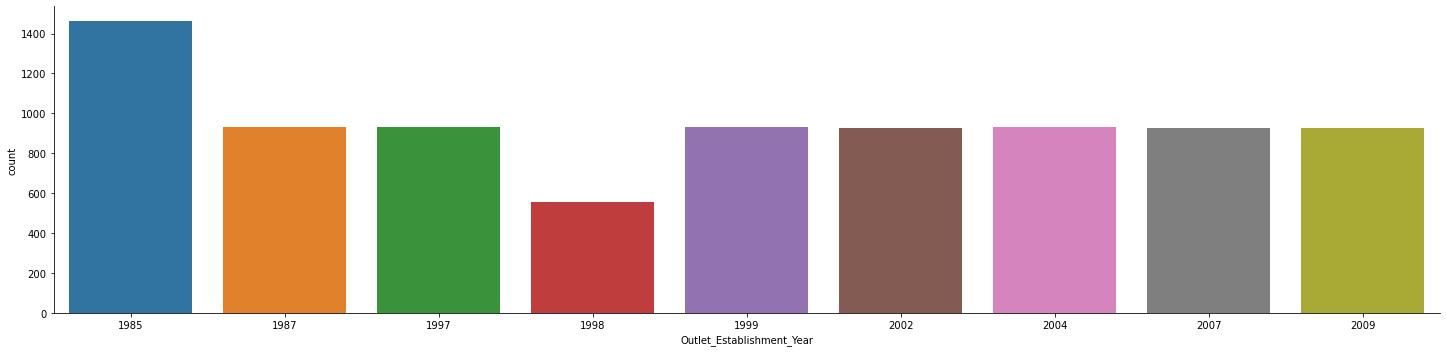

In [23]:
sns.catplot('Outlet_Establishment_Year',kind = 'count',data = train,aspect =4);

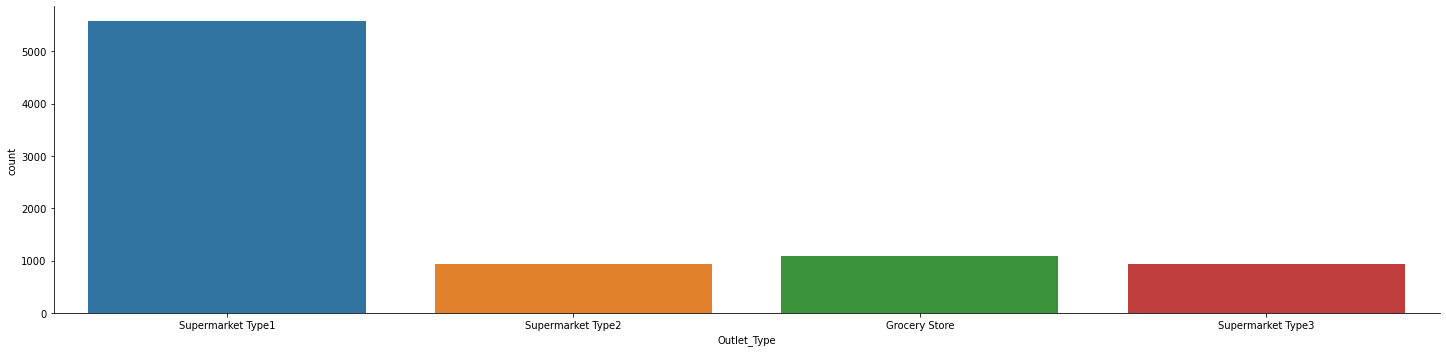

In [24]:
sns.catplot('Outlet_Type',kind = 'count',data = train,aspect =4);

### Observations

Lesser number of observations in the data for the outlets established in the year 1998 as compared to the other years.
Supermarket Type 1 seems to be the most popular category of Outlet_Type.


### Target Variable vs Independent Numerical Variables

##### After looking at every feature individually, let’s now do some bivariate analysis. Here we’ll explore the independent variables with respect to the target variable. The objective is to discover hidden relationships between the independent variable and the target variable and use those findings in missing data imputation and feature engineering in the next module.

##### We will make use of scatter plots for the continuous or numeric variables and violin plots for the categorical variables.



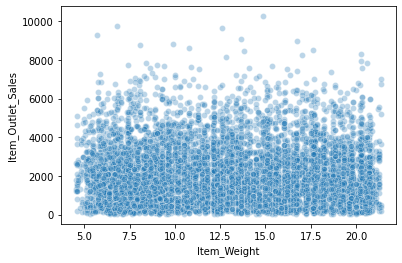

In [25]:
sns.scatterplot(x = 'Item_Weight',y = 'Item_Outlet_Sales',data = train,alpha = 0.3);

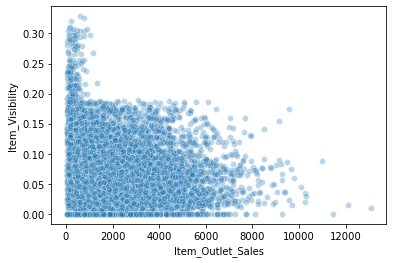

In [26]:
sns.scatterplot(x = 'Item_Outlet_Sales',y = 'Item_Visibility',data = train,alpha = 0.3);

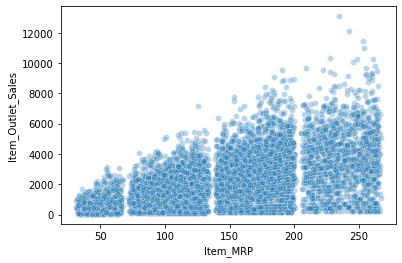

In [27]:
sns.scatterplot(x = 'Item_MRP',y = 'Item_Outlet_Sales',data = train,alpha = 0.3);

### Observations

Item_Outlet_Sales is spread well across the entire range of the Item_Weight without any obvious pattern.
In Item_Visibility vs Item_Outlet_Sales, there is a string of points at Item_Visibility = 0.0 which seems strange as item visibility cannot be completely zero. We will take note of this issue and deal with it in the later stages.
In the third plot of Item_MRP vs Item_Outlet_Sales, we can clearly see 4 segments of prices that can be used in feature engineering to create a new variable.


### Target Variable vs Independent Categorical Variables

Now we’ll visualise the categorical variables with respect to Item_Outlet_Sales. We will try to check the distribution of the target variable across all the categories of each of the categorical variable.

We could have used boxplots here, but instead we’ll use the violin plots as they show the full distribution of the data. The width of a violin plot at a particular level indicates the concentration or density of data at that level. The height of a violin tells us about the range of the target variable values.

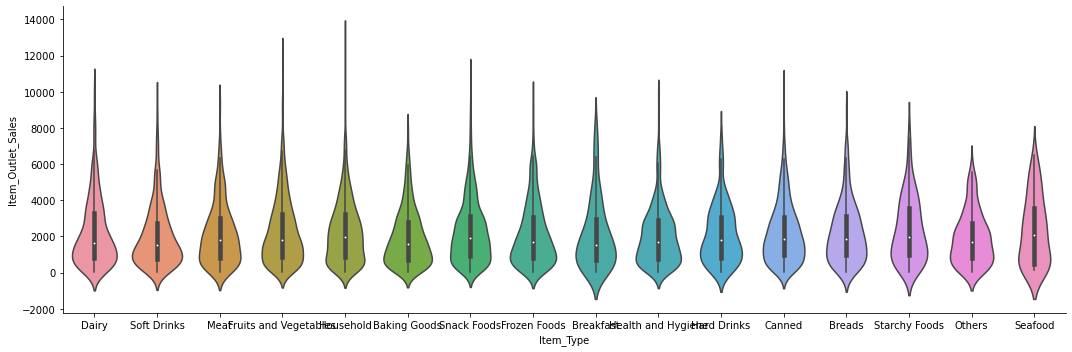

In [28]:
sns.catplot(x = 'Item_Type',y = 'Item_Outlet_Sales',kind = 'violin',data = train,aspect=3);

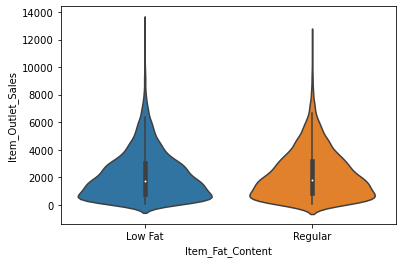

In [29]:
sns.violinplot(x = 'Item_Fat_Content',y = 'Item_Outlet_Sales',data = train);

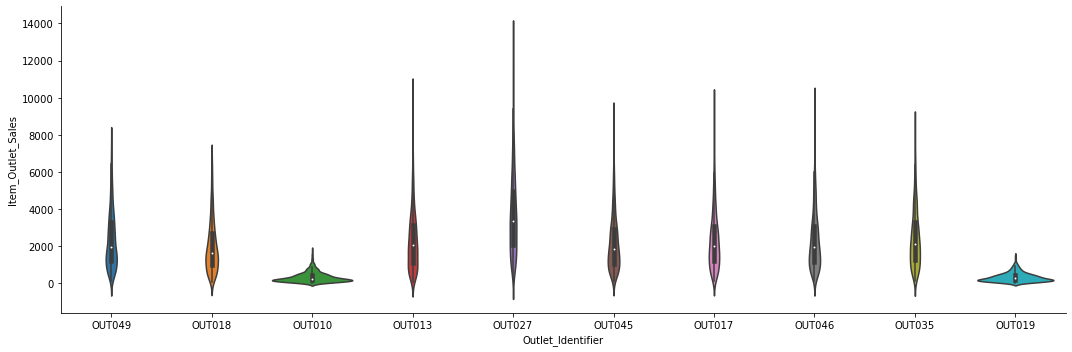

In [30]:
sns.catplot('Outlet_Identifier','Item_Outlet_Sales',kind = 'violin',data = train,aspect = 3);

### Observations

<ul><li>Distribution of Item_Outlet_Sales across the categories of Item_Type is not very distinct and same is the case with Item_Fat_Content.</li>
<li>The distribution for OUT010 and OUT019 categories of Outlet_Identifier are quite similar and very much different from the rest of the categories of Outlet_Identifier.</li></ul>

In the univariate analysis let’s check the distribution of the target variable across Outlet_Size.

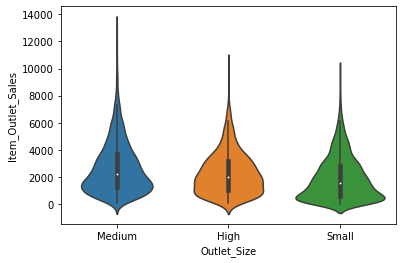

In [31]:
sns.violinplot('Outlet_Size','Item_Outlet_Sales',data = train);

Let’s examine the remaining variables.

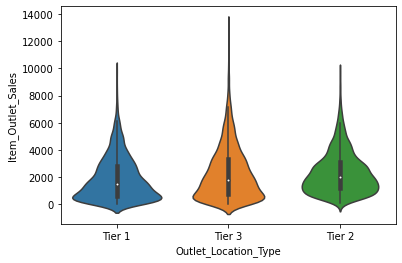

In [32]:
sns.violinplot('Outlet_Location_Type','Item_Outlet_Sales',data = train);

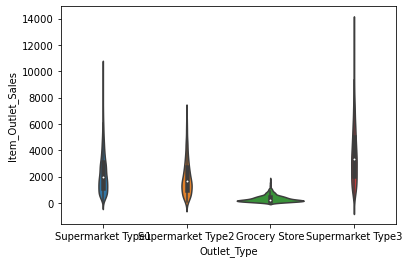

In [33]:
sns.violinplot('Outlet_Type','Item_Outlet_Sales',data = train);

### Observations

<ul><li>Tier 1 and Tier 3 locations of Outlet_Location_Type look similar.</li>
<li>In the Outlet_Type plot, Grocery Store has most of its data points around the lower sales values as compared to the other categories.</li></ul>


These are the kind of insights that we can extract by visualizing our data. Hence, data visualization should be an important part of any kind data analysis.




### Missing Data Treatment

In [34]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder
l_enc  = LabelEncoder()
a = l_enc.fit_transform(train['Item_Identifier'])

In [36]:
a

array([ 156,    8,  662, ..., 1357,  681,   50])

In [37]:
train['Item_Weight'].fillna(a.mean(),inplace = True)

In [38]:
train.Item_Weight.isna().sum()

0

In [39]:
train['Outlet_Size'].fillna('Small',inplace  = True)

In [40]:
train['Outlet_Size'].isna().sum()

0

### Replacing 0’s in Item_Visibility variable


Similarly, zeroes in Item_Visibility variable can be replaced with Item_Visibility wise mean values. It can be visualized in the plot below.

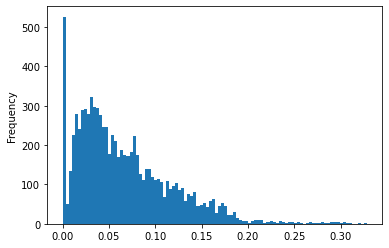

In [41]:
train['Item_Visibility'].plot(kind = 'hist',bins = 100);

In [42]:
a= train[train['Item_Visibility']!=0]['Item_Visibility'].mean()

In [43]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0.00,a)

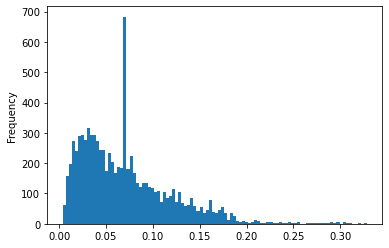

In [44]:
train['Item_Visibility'].plot(kind = 'hist',bins = 100);

### Feature Engineering

Most of the times, the given features in a dataset are not sufficient to give satisfactory predictions. In such cases, we have to create new features which might help in improving the model’s performance. Let’s try to create some new features for our dataset.

In this section we will create the following new features:

<ul><li>Item_Type_new: Broader categories for the variable Item_Type.</li>
<li>Item_category: Categorical variable derived from Item_Identifier.</li>
<li>Outlet_Years: Years of operation for outlets.</li>
<li>price_per_unit_wt: Item_MRP/Item_Weight</li>
<li>Item_MRP_clusters: Binned feature for Item_MRP.</li></ul>


We can have a look at the Item_Type variable and classify the c
ategories into perishable and non_perishable as per our understanding and make it into a new feature.

In [45]:
perishable = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood"]
non_perishable = ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks"]

In [46]:
item_list =[] 
for i in train['Item_Type']:
    if i in perishable:
        item_list.append('perishable')
    elif (i in non_perishable):
        item_list.append('non_perishable')
    else:
        item_list.append('not_sure')
        
train['Item_Type_new'] = item_list

In [47]:
train['Item_Category'] =train['Item_Identifier'].replace({'^DR[A-Z]*[0-9]*':'DR','^FD[A-Z]*[0-9]*':'FD','^NC[A-Z]*[0-9]*':'NC'},regex = True)

In [48]:
Food=pd.crosstab(train['Item_Type'],train['Item_Category'])
Food

Item_Category,DR,FD,NC
Item_Type,,,
Baking Goods,0,648,0
Breads,0,251,0
Breakfast,0,110,0
Canned,0,649,0
Dairy,140,542,0
Frozen Foods,0,856,0
Fruits and Vegetables,0,1232,0
Hard Drinks,214,0,0
Health and Hygiene,0,0,520


We will also change the values of Item_Fat_Content wherever Item_category is ‘NC’ because non-consumable items cannot have any fat content. We will also create a couple of more features — Outlet_Years (years of operation) and price_per_unit_wt (price per unit weight).

In [49]:
train['Item_Fat_Content'][(train['Item_Category']=='NC')]='Non Edible'

In [50]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'Non Edible'], dtype=object)

In [51]:
train['Outlet_Years'] = 2019-train['Outlet_Establishment_Year']

In [52]:
train['Price_Per_Unit_Weight'] = train['Item_MRP']/train['Item_Weight']

Earlier in the Item_MRP vs Item_Outlet_Sales plot, we saw Item_MRP was spread across in 4 chunks. Now let’s assign a label to each of these chunks and use this label as a new variable.

In [53]:
def clusters(x):
    if x<69:
        return '1st'
    elif x in range(69,136):
        return '2nd'
    elif x in range(136,203):
        return '3rd'
    else:
        return '4th'
train['Item_MRP_Clusters'] = train['Item_MRP'].astype('int').apply(clusters)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_new,Item_Category,Outlet_Years,Price_Per_Unit_Weight,Item_MRP_Clusters
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,perishable,FD,20,26.861204,4th
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,non_perishable,DR,10,8.153581,1st
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,perishable,FD,20,8.092457,3rd
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,perishable,FD,21,9.484115,3rd
4,NCD19,8.93,Non Edible,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,non_perishable,NC,32,6.031512,1st


### Encoding Categorical Variables

Most of the machine learning algorithms produce better result with numerical variables only. So, it is essential to treat the categorical variables present in the data. One thing that can be done is to completely remove the categorical variables, but that would lead to enormous loss of information. Fortunately we have smarter techniques to deal with the categorical variables.

In this stage, we will convert our categorical variables into numerical ones. We will use 2 techniques — Label Encoding and One Hot Encoding.

<ul><b>1). Label encoding </b>simply means converting each category in a variable to a number. It is more suitable for ordinal variables — categorical variables with some order.</ul>

<ul><b>2). In One hot encoding</b>, each category of a categorical variable is converted into a new binary column (1/0).</ul>



### Label encoding for the categorical variables

I will label encode Outlet_Size and Outlet_Location_Type as these are ordinal variables.

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
# a = ['Outlet_Size','Outlet_Location_Type']
le = LabelEncoder()
train['Outlet_Size']= le.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])
train['Item_MRP_Clusters'] = le.fit_transform(train['Item_MRP_Clusters'])

### One hot encoding for the categorical variable

In [56]:
#train['Outlet_Identifier'].unique(),train['Item_Identifier'].unique(),train['Item_Type'].unique()
a = pd.get_dummies(train[['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new','Item_Category']])
train = train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new','Item_Category','source'],axis = 1 )
train = pd.concat([train,a],axis = 1)

In [57]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Years,Price_Per_Unit_Weight,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_non_perishable,Item_Type_new_not_sure,Item_Type_new_perishable,Item_Category_DR,Item_Category_FD,Item_Category_NC
0,9.300,0,0.016047,249.8092,1999,1,0,3735.1380,20,26.861204,...,0,1,0,0,0,0,1,0,1,0
1,5.920,2,0.019278,48.2692,2009,1,2,443.4228,10,8.153581,...,0,0,1,0,1,0,0,1,0,0
2,17.500,0,0.016760,141.6180,1999,1,0,2097.2700,20,8.092457,...,0,1,0,0,0,0,1,0,1,0
3,19.200,2,0.070482,182.0950,1998,2,2,732.3800,21,9.484115,...,1,0,0,0,0,0,1,0,1,0
4,8.930,1,0.070482,53.8614,1987,0,2,994.7052,32,6.031512,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1987,0,2,2778.3834,32,31.248623,...,0,1,0,0,0,1,0,0,1,0
8519,8.380,2,0.046982,108.1570,2002,2,1,549.2850,17,12.906563,...,0,1,0,0,1,0,0,0,1,0
8520,10.600,1,0.035186,85.1224,2004,2,1,1193.1136,15,8.030415,...,0,1,0,0,1,0,0,0,0,1
8521,7.210,2,0.145221,103.1332,2009,1,2,1845.5976,10,14.304189,...,0,0,1,0,0,1,0,0,1,0


### PreProcessing Data

In simple words, pre-processing refers to the transformations applied to your data before feeding it to the algorithm. It invloves further cleaning of data, data transformation, data scaling and many more things.


In [58]:
train['Price_Per_Unit_Weight'] = np.log(train['Price_Per_Unit_Weight'])
train['Item_Visibility'] = np.log(train['Item_Visibility'])

In [59]:
corr = train.corr()

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(train.corr().abs(),  annot=True)

plt.figure(figsize=(16,16))
sns.heatmap(train.corr(),cmap='Blues', annot=True, annot_kws={'size': 12},fmt='.1f', cbar=True)
plt.xticks(range(len(corr.columns)),corr.columns)a
plt.yticks(range(len(corr.columns)),corr.columns)

plt.show()

### Model Building

In [ ]:
X = train.drop('Item_Outlet_Sales',axis = 1)
y = train['Item_Outlet_Sales']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 8)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

In [ ]:
X_train.head(2)

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [ ]:
model = LinearRegression(normalize=True,fit_intercept= True)
model.fit(X,y)
y_pred = model.predict(X_test)

In [ ]:
model.score(X_train,y_train),model.score(X_test,y_test)

In [ ]:
mean_squared_error(y_test, y_pred),mean_absolute_error(y_test, y_pred)

In [ ]:
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_test))

#### XGBOOST REGRESSOR

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train,y_train)
predictions = my_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,predictions)))

#### LASSO REGRSSOR

In [ ]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha = 0.01)
ls.fit(X_train,y_train)
predictions = ls.predict(X_valid)
mean_absolute_error(y_valid,predictions)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_test))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score


tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_test))
print("Training Data F1 Score ", f1_score(y_train,y_test))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())